In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data_dir = '/home/andris/GitHub/data/churn_prediction/teacher_time_series.csv'


In [5]:
df = pd.read_csv(data_dir)

df.head()

,Unnamed: 0,user_id,date_created,event_type,registration_date
0,0,00026a46eefde681a60b50bd7c2368c3091d035b2f5658...,2015-12-09 22:06:35.997,attempt,2015-12-09 22:20:36.767
1,1,00026a46eefde681a60b50bd7c2368c3091d035b2f5658...,2015-12-09 22:07:28.978,attempt,2015-12-09 22:20:36.767
2,2,00026a46eefde681a60b50bd7c2368c3091d035b2f5658...,2015-12-09 22:08:11.751,attempt,2015-12-09 22:20:36.767
3,3,00026a46eefde681a60b50bd7c2368c3091d035b2f5658...,2015-12-09 22:08:55.058,attempt,2015-12-09 22:20:36.767
4,4,00026a46eefde681a60b50bd7c2368c3091d035b2f5658...,2015-12-09 22:24:51.928,attempt,2015-12-09 22:20:36.767


In [6]:
def prepare_df(df,date_feature, group_array,start_date,end_date):

    # Convert to datetime format
    df[date_feature] = pd.to_datetime(df[date_feature])

    # Select data from dates according to start_date and end_date
    df = df[df[date_feature]>= pd.to_datetime(start_date)]
    df = df[df[date_feature]<= pd.to_datetime(end_date)]

    # Group according to categories
    df_grp = df.groupby(group_array).count();

    # Unpack the indices into columns
    df_grp = df_grp.xs(date_feature, axis=1, drop_level=True)
    df_grp = df_grp.unstack().fillna(0)
  
    # Return the dataframe
    return df_grp

In [18]:
# Create a new column that discretises the time into seperate time legs

dt = 30*24*3600
df['event_leg'] = np.floor((pd.to_datetime(df['date_created']) - pd.to_datetime(df['registration_date'])).dt.total_seconds()/dt)
  

In [21]:
# Group and create a new multi index dataframe  

start_date = '2014-08-01'
end_date = '2017-08-01'

df_grp = prepare_df(df,'date_created',['user_id','event_leg','event_type'],start_date,end_date)
df_grp.head()

event_type                                                    add_assig  \
user_id                                            event_leg              
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... -1.0             0.0   
                                                    0.0             0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d...  0.0             0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c...  0.0             0.0   
                                                    1.0             0.0   

event_type                                                    add_custom_assig  \
user_id                                            event_leg                     
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... -1.0                    0.0   
                                                    0.0                    0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d...  0.0                    0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c...  0.0                    0.0   
                                                    1.0                    0.0   

event_type                                                    add_user  \
user_id                                            event_leg             
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... -1.0            0.0   
                                                    0.0            0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d...  0.0            0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c...  0.0            0.0   
                                                    1.0            0.0   

event_type                                                    attempt  \
user_id                                            event_leg            
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... -1.0           4.0   
                                                    0.0           3.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d...  0.0           4.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c...  0.0           8.0   
                                                    1.0           5.0   

event_type                                                    create_group  \
user_id                                            event_leg                 
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... -1.0                0.0   
                                                    0.0                0.0   
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d...  0.0                0.0   
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c...  0.0                0.0   
                                                    1.0                0.0   

event_type                                                    view_assig_prog  
user_id                                            event_leg                   
00026a46eefde681a60b50bd7c2368c3091d035b2f56582... -1.0                   0.0  
                                                    0.0                   0.0  
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d...  0.0                   0.0  
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726c...  0.0                   0.0  
                                                    1.0                   0.0

Number of teachers 3249


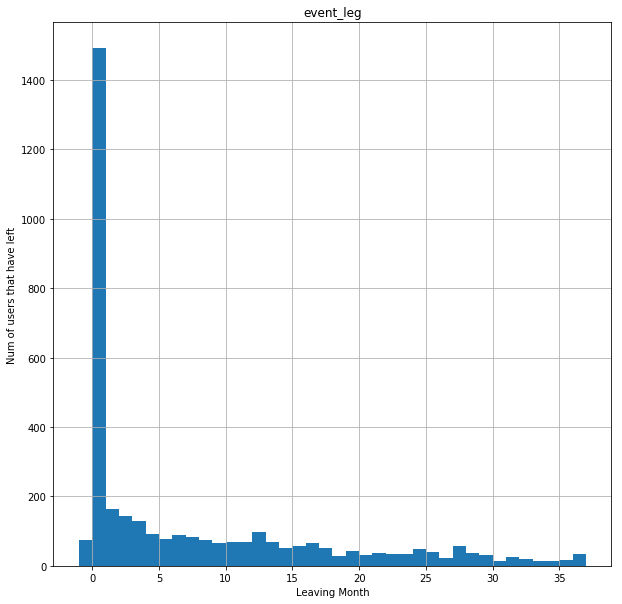

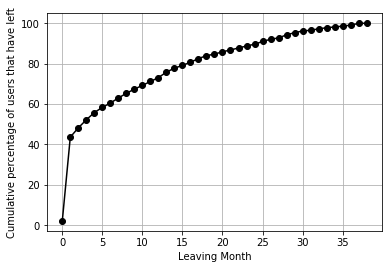

In [100]:
# First let's check the unique number of teachers that there are

print('Number of teachers',len(df_grp.index.get_level_values(0).unique()))

# Churn pattern of teachers
churn_pattern = df[['user_id','event_leg']].groupby('user_id').max()
churn_pattern.hist(bins=int(churn_pattern.max())+1,figsize=(10,10))
plt.xlabel('Leaving Month')
plt.ylabel('Num of users that have left')
plt.show()

y = churn_pattern['event_leg'].value_counts().reset_index().sort_values('index').set_index('index').cumsum()*100/sum(churn_pattern['event_leg'].value_counts())
plt.plot(range(len(y)),y['event_leg'],'-ok')
plt.ylabel('Cumulative percentage of users that have left')
plt.xlabel('Leaving Month')
plt.grid()
plt.show()



In [176]:
# Quantity of actions
df_new = df_grp.reset_index().groupby('user_id').sum()
df_new = df_new.drop('event_leg',axis=1)
df_new.head()

event_type,add_assig,add_custom_assig,add_user,attempt,create_group,view_assig_prog
user_id,,,,,,
00026a46eefde681a60b50bd7c2368c3091d035b2f565824640272c89eb6916a,0.0,0.0,0.0,7.0,0.0,0.0
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d1663a47a8a9f1937f,0.0,0.0,0.0,4.0,0.0,0.0
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726cb140669288a58515b,0.0,31.0,98.0,38.0,1.0,62.0
001ee4c077e3972984ebddee5d8928ea3be07031025d61888f2f4c58f61179ee,4.0,2.0,24.0,16.0,1.0,10.0
0037979dda749ad521e81ac59c594706d4ab73f53003793016e877be4ce41efb,0.0,2.0,12.0,1.0,1.0,4.0


In [185]:
# Checking for any nan
df_new.head()

event_type,add_assig,add_custom_assig,add_user,attempt,create_group,view_assig_prog
user_id,,,,,,
00026a46eefde681a60b50bd7c2368c3091d035b2f565824640272c89eb6916a,0.0,0.0,0.0,7.0,0.0,0.0
0018d184ff3b1f2336ebeac5646d13ca84de10d034adc5d1663a47a8a9f1937f,0.0,0.0,0.0,4.0,0.0,0.0
001c6813b7449d381899502fb8f1bbbb9239a2b3d8b726cb140669288a58515b,0.0,31.0,98.0,38.0,1.0,62.0
001ee4c077e3972984ebddee5d8928ea3be07031025d61888f2f4c58f61179ee,4.0,2.0,24.0,16.0,1.0,10.0
0037979dda749ad521e81ac59c594706d4ab73f53003793016e877be4ce41efb,0.0,2.0,12.0,1.0,1.0,4.0


In [189]:
# Removing outliers outside 5% 

df_new = df_new[(df_new < df_new.quantile(0.95)).all(axis=1)]

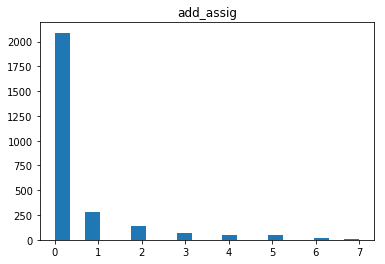

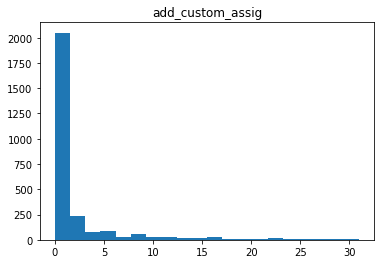

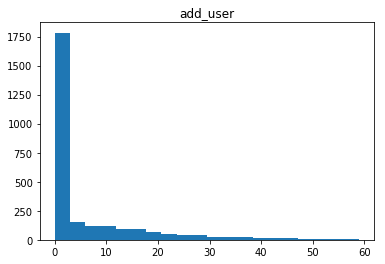

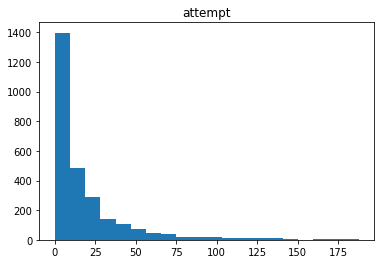

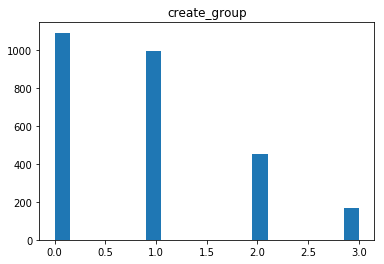

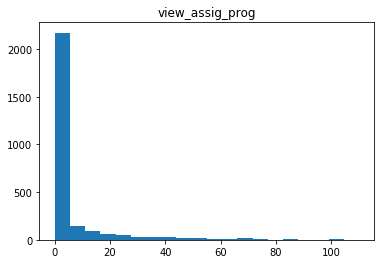

In [192]:

for item in df_new.keys():
    
    plt.hist(df_new[item],20)
    #plt.ylim(0,100)
    plt.title(item)
    plt.show()

## Conclusions from the preliminary data analysis


* A large fraction of users drop off the platform within the first month (around 40%). Then they continue to use the platform.
* Number of attempts and creating groups has a large differential effect. 
* Teachers do not tend to assign more than 3 groups. 
* Users added, viewing assignment progress and adding assignments does not have alot of differential. 

Now the question is whether we can predict the rate of teacher churn. 